In [2]:
!pip install matplotlib
!pip install numpy
!pip install rioxarray
!pip install geopandas
!pip install earthpy
!pip install earthpy-spatial

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement earthpy-spatial (from versions: none)
ERROR: No matching distribution found for earthpy-spatial


In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
data = et.data.get_data('cold-springs-fire')

Extracted output to /root/earth-analytics/data/cold-springs-fire/.


In [6]:
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.titlesize'] = 20

In [7]:
naip_csf_path = os.path.join("cold-springs-fire",
                             "naip",
                             "m_3910505_nw_13_1_20150919",
                             "crop",
                             "m_3910505_nw_13_1_20150919_crop.tif")

naip_csf = rxr.open_rasterio(naip_csf_path, masked=True)
naip_csf

<xarray.DataArray (band: 4, y: 2312, x: 4377)> Size: 162MB
[40478496 values with dtype=float32]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 35kB 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 18kB 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0

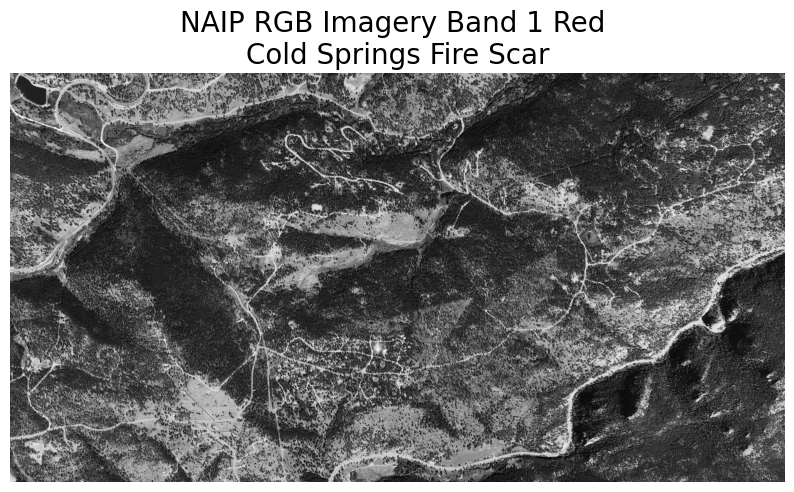

In [8]:
fig, ax = plt.subplots()

ax.imshow(naip_csf[0],
          cmap="Greys_r")
ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")
ax.set_axis_off()
plt.show()

In [9]:
naip_csf.shape #4 band, rows and columns

(4, 2312, 4377)

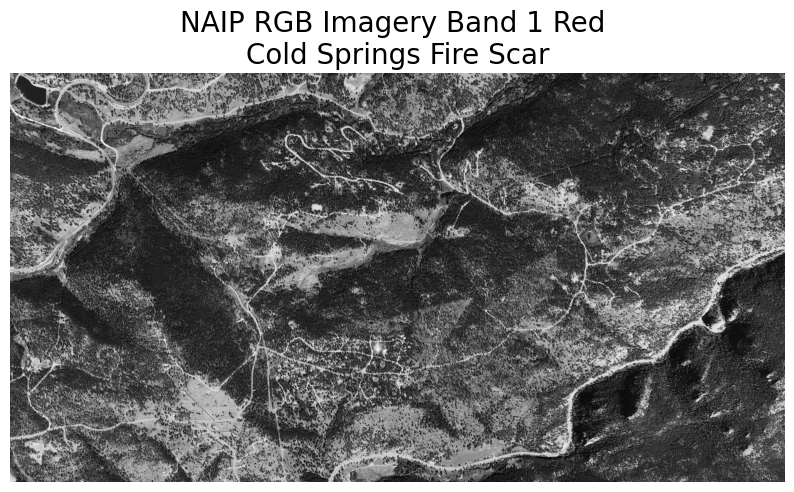

In [10]:
fig, ax = plt.subplots()

ax.imshow(naip_csf[0],
          cmap="Greys_r")
ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")
ax.set_axis_off()
plt.show()

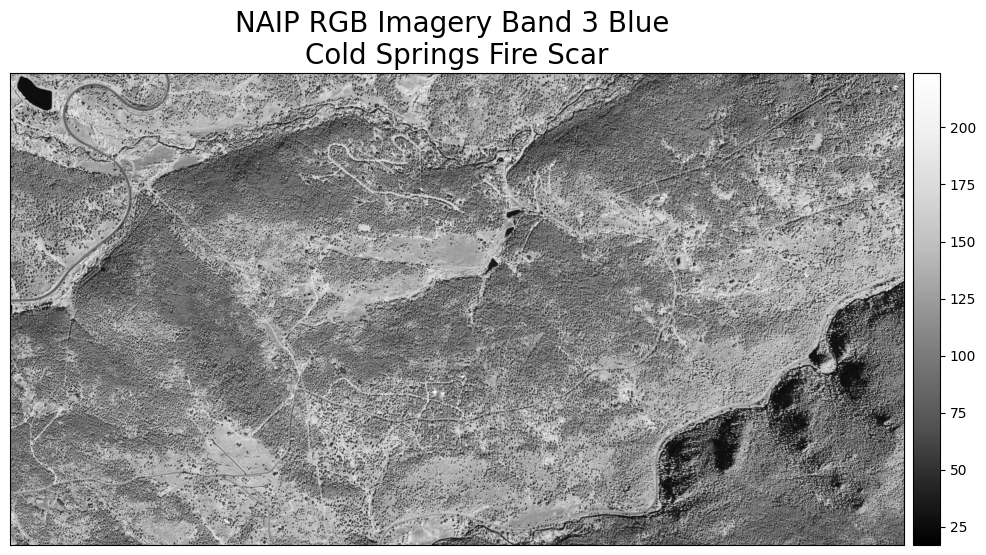

In [21]:
ep.plot_bands(naip_csf[3], title="NAIP RGB Imagery Band 3 Blue \nCold Springs Fire Scar",
              cmap="Greys_r",
              cbar =True)
plt.show()

In [20]:
naip_csf.band #for knowing the band in image

<xarray.DataArray 'band' (band: 4)> Size: 32B
array([1, 2, 3, 4])
Coordinates:
  * band         (band) int64 32B 1 2 3 4
    spatial_ref  int64 8B 0

In [23]:
print (naip_csf.min())
print (naip_csf.max())

<xarray.DataArray ()> Size: 8B
array(17.)
Coordinates:
    spatial_ref  int64 8B 0
<xarray.DataArray ()> Size: 8B
array(242.)
Coordinates:
    spatial_ref  int64 8B 0


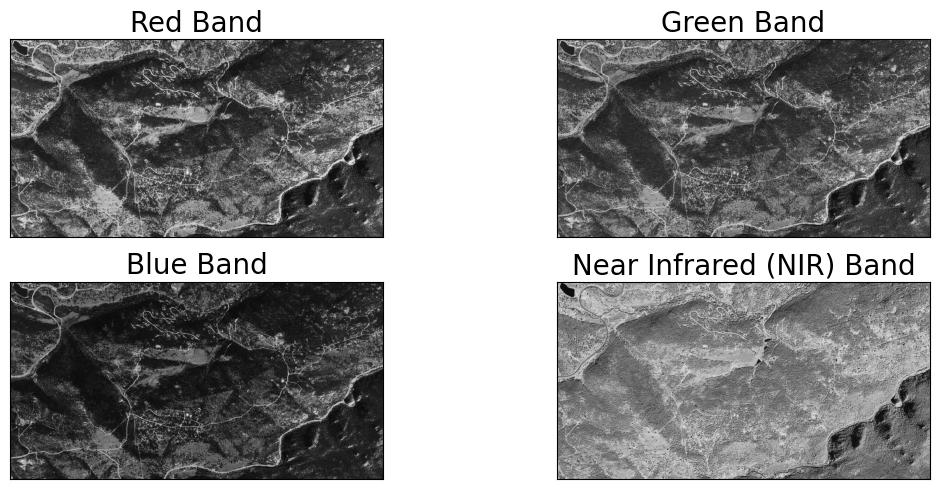

In [29]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# ep.plot_bands is for Plotting  all bands(earthpy function)
ep.plot_bands(naip_csf,
              figsize=(12, 5),
              cols=2,
              title=titles,
              cbar=False)
plt.show()

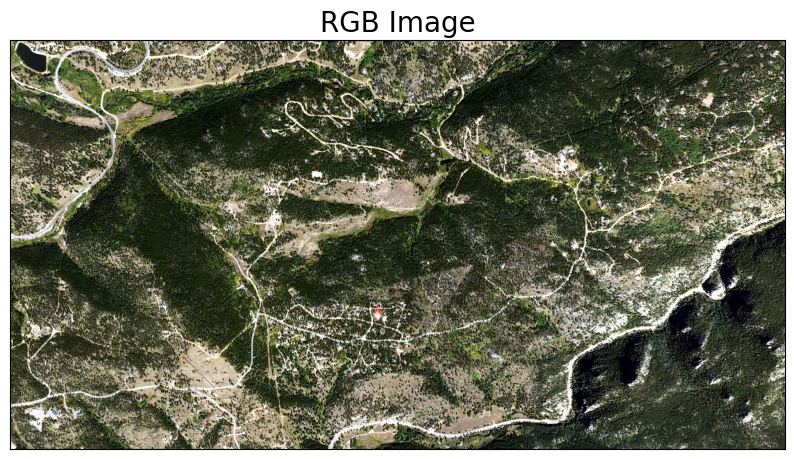

In [37]:
ep.plot_rgb(naip_csf.values, rgb=[0,1,2], title= 'RGB Image', stretch= False ) # Stretching the value for better detection
plt.show()

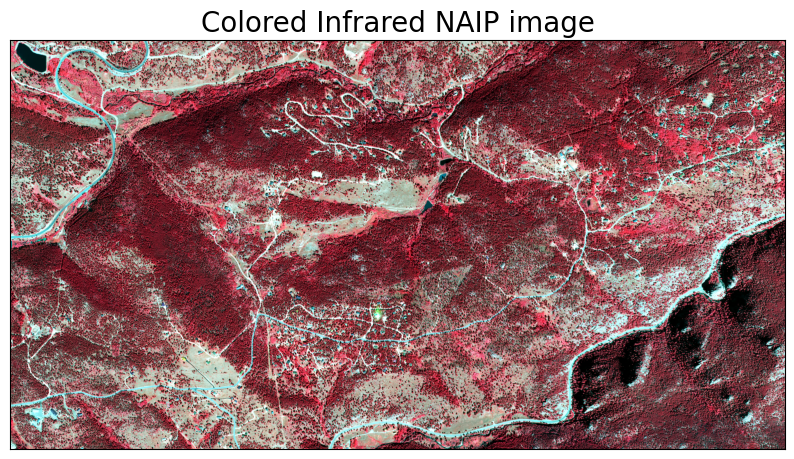

In [36]:
ep.plot_rgb(naip_csf.values, title="Colored Infrared NAIP image",
            rgb=[3, 0, 1],
            figsize=(10, 8),
            stretch= True)
plt.show()

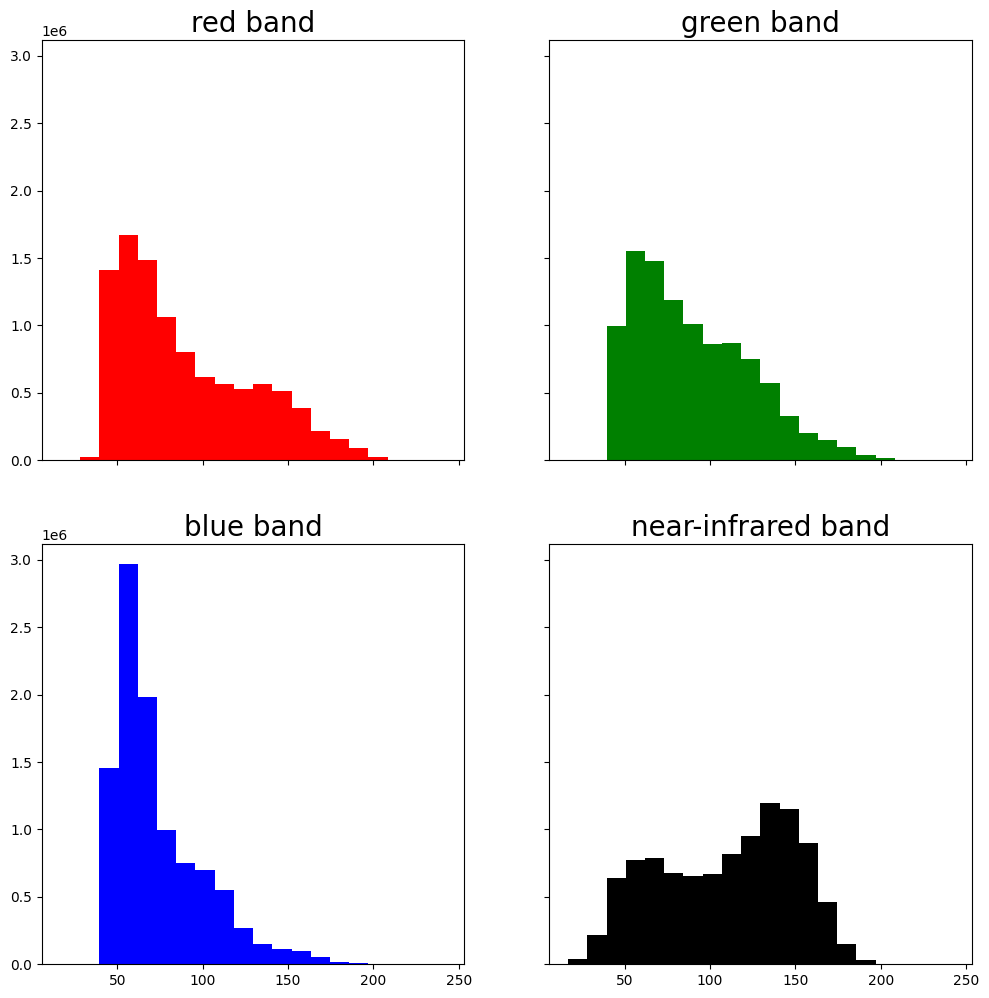

In [40]:
colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'near-infrared band']

ep.hist(naip_csf.values,
        colors=colors,
        title=titles,
        cols=2)

plt.show()